In [91]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreeja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
t_data=pd.read_csv("twitter_training.csv")
v_data=pd.read_csv("twitter_validation.csv")

In [94]:
t_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [95]:
v_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [96]:
t_data.columns=['id','game','sentiment','text']
v_data.columns=['id','game','sentiment','text']

In [97]:
t_data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [98]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [99]:
t_data.shape

(74681, 4)

In [100]:
t_data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [101]:
t_data.describe(include='all')

,id,game,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [102]:
id_types=t_data['id'].value_counts()
id_types

id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

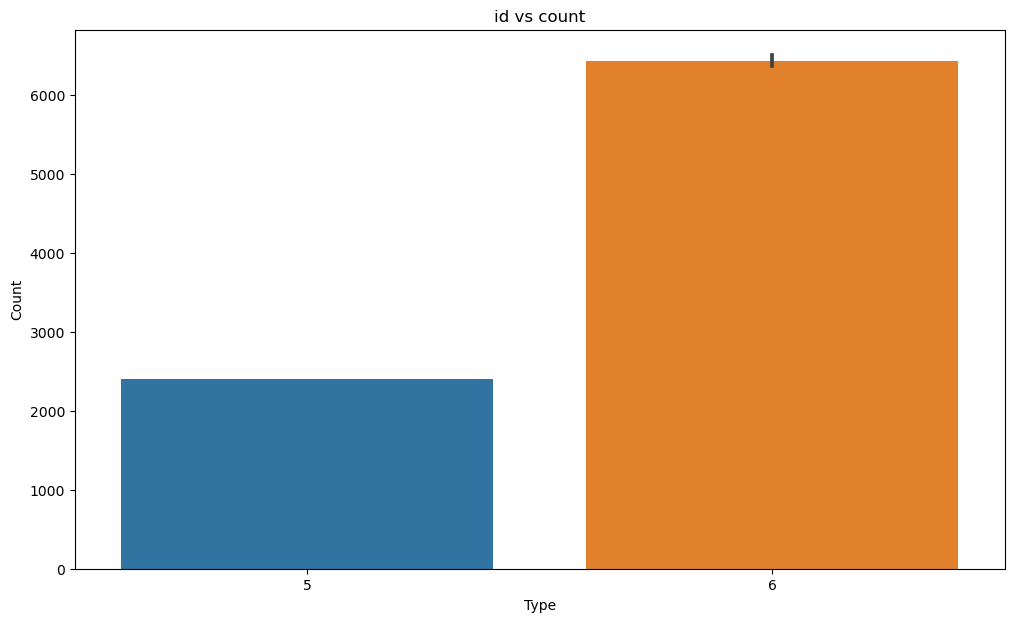

In [103]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index,x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('id vs count')
plt.show()

In [104]:
game_types=t_data['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

Text(0.5, 0, 'count')

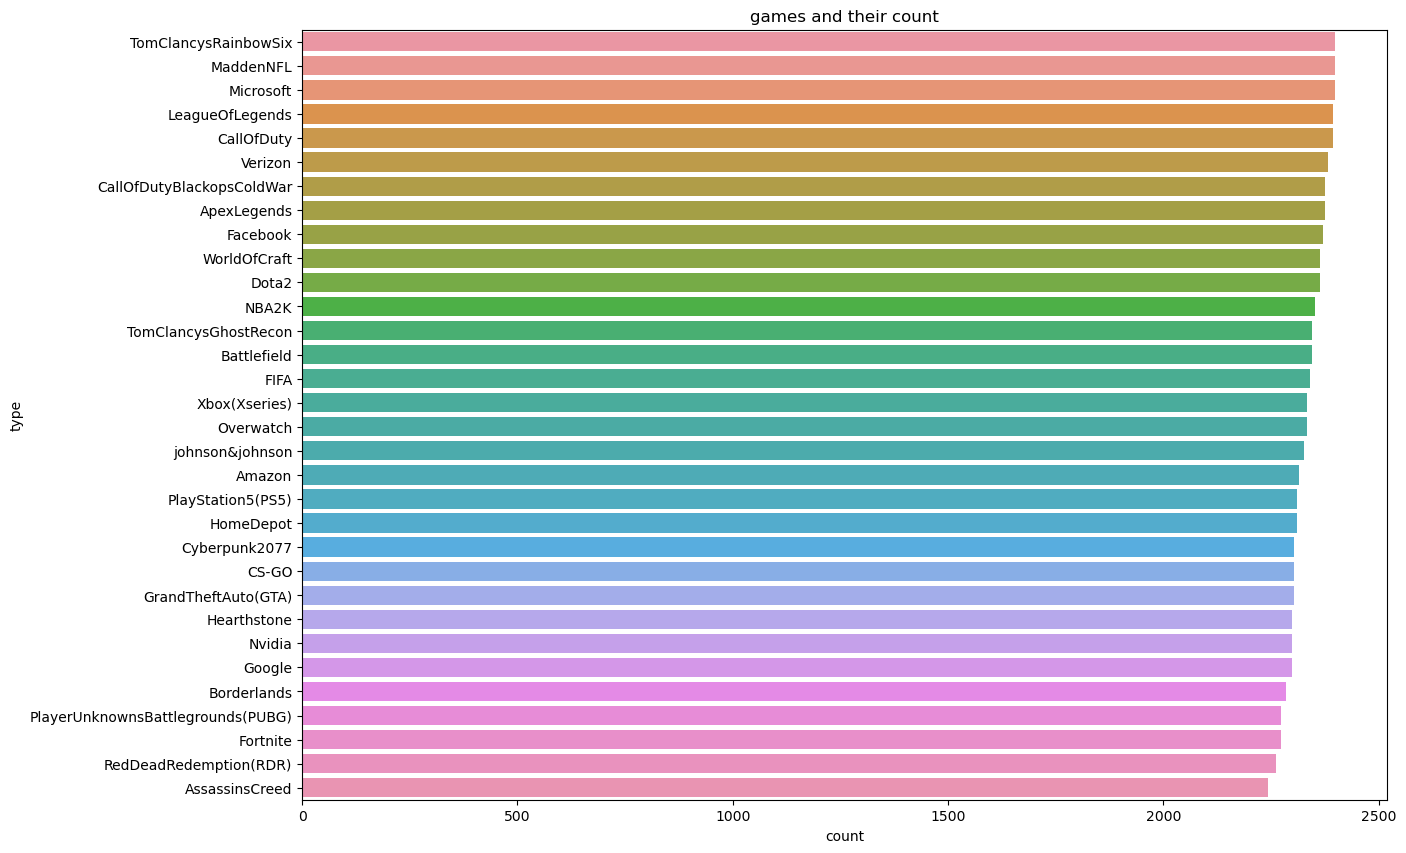

In [105]:
plt.figure(figsize=(14,10))
sns.barplot(x=game_types.values,y=game_types.index)
plt.title('games and their count')
plt.ylabel('type')
plt.xlabel('count')

/Users/sreeja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


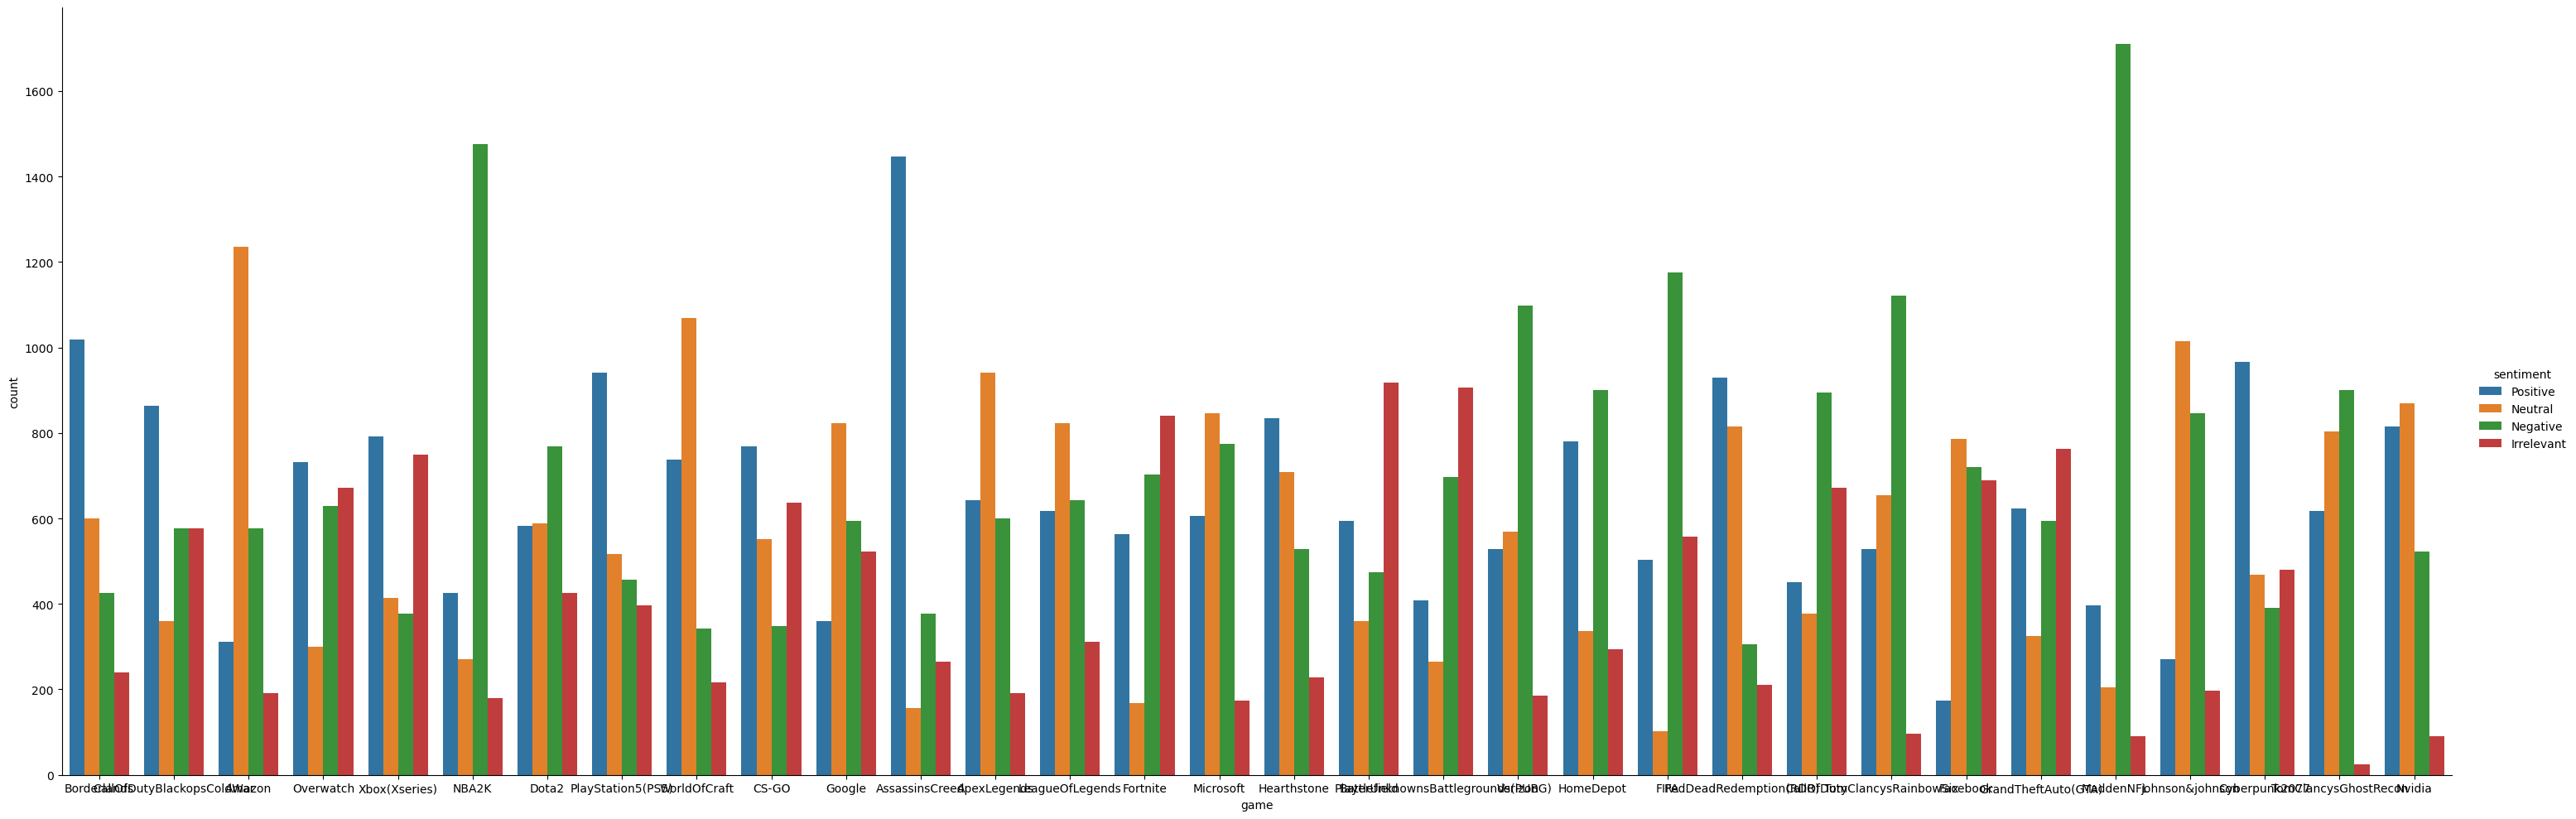

In [106]:
sns.catplot(x="game",hue="sentiment",kind="count",height=10,aspect=3,data=t_data)

In [107]:
total_null=t_data.isnull().sum().sort_values(ascending=False)
percent=((t_data.isnull().sum()/t_data.isnull().count()*100).sort_values(ascending=False))
print("total records=",t_data.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['total missing','in percent'])
missing_data.head(10)

total records= 74681


,total missing,in percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [108]:
t_data.dropna(subset=['text'],inplace=True)

total_null=t_data.isnull().sum().sort_values(ascending=False)
percent=((t_data.isnull().sum()/t_data.isnull().count())*100).sort_values(ascending=False)
print("total records=",t_data.shape[0])
missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['total missing','in percent'])
missing_data.head(10)

total records= 73995


,total missing,in percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [109]:
t0=t_data[t_data['sentiment']=='Negative']
t1=t_data[t_data['sentiment']=='Positive']
t2=t_data[t_data['sentiment']=='Irrelevant']
t3=t_data[t_data['sentiment']=='Neutral']

In [110]:
t0.shape,t1.shape,t2.shape,t3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [111]:
t0=t0[:int(t0.shape[0]/12)]
t1=t1[:int(t1.shape[0]/12)]
t2=t2[:int(t2.shape[0]/12)]
t3=t3[:int(t3.shape[0]/12)]

In [112]:
t0.shape,t1.shape,t2.shape,t3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [113]:
data=pd.concat([t0,t1,t2,t3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [114]:
id_types=data['id'].value_counts()
id_types

id
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

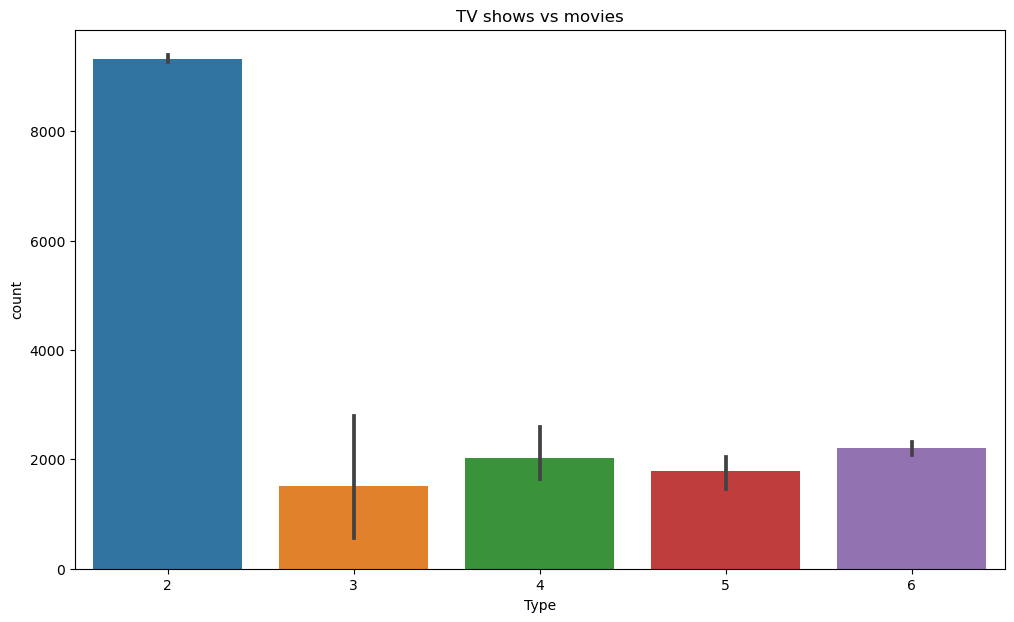

In [115]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)
plt.xlabel('Type')
plt.ylabel('count')
plt.title('TV shows vs movies')
plt.show()

In [116]:
game_types=data['game'].value_counts()
game_types

game
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

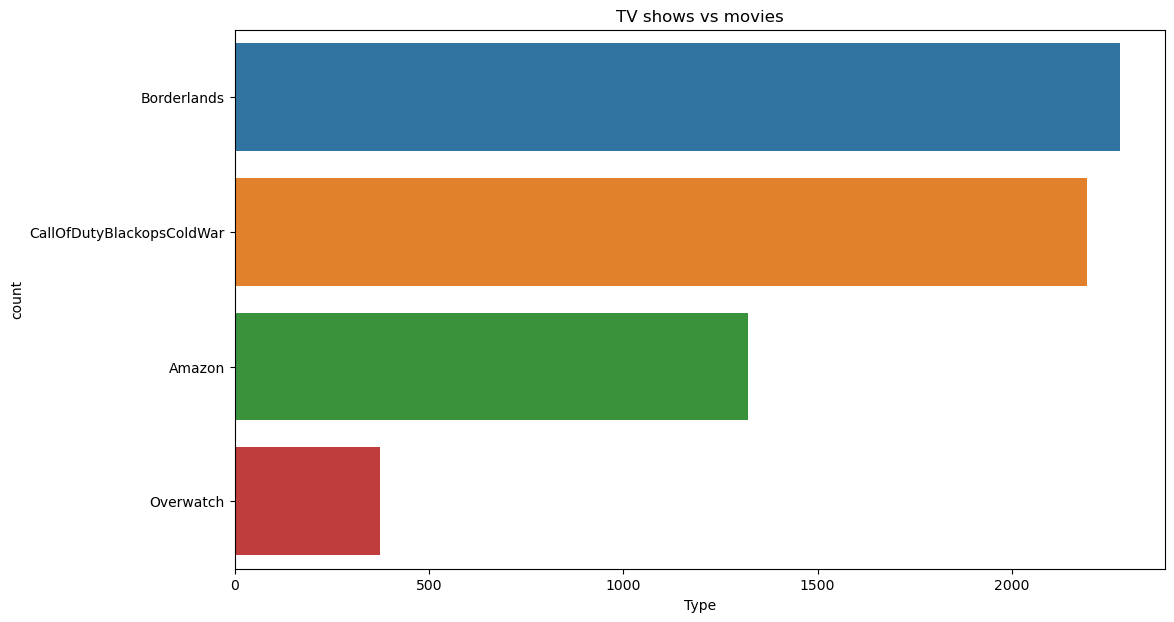

In [117]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)
plt.xlabel('Type')
plt.ylabel('count')
plt.title('TV shows vs movies')
plt.show()

In [118]:
sentiment_types=data['sentiment'].value_counts()
sentiment_types

sentiment
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

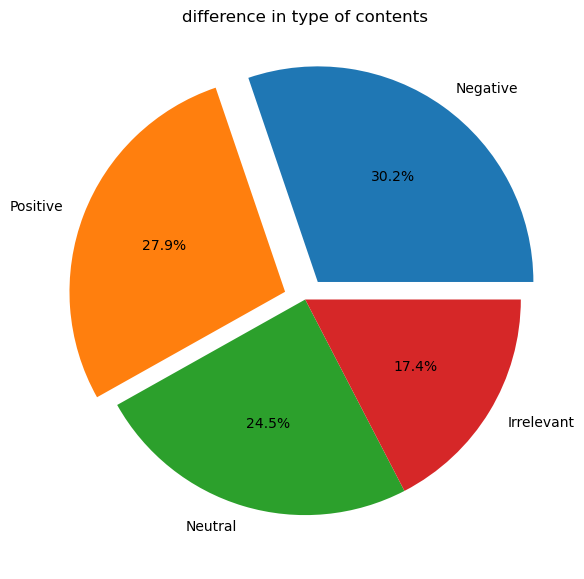

In [119]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values,labels=sentiment_types.index,autopct='%.1f%%',explode=[0.1,0.1,0,0])
plt.title('difference in type of contents')
plt.show()

/Users/sreeja/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


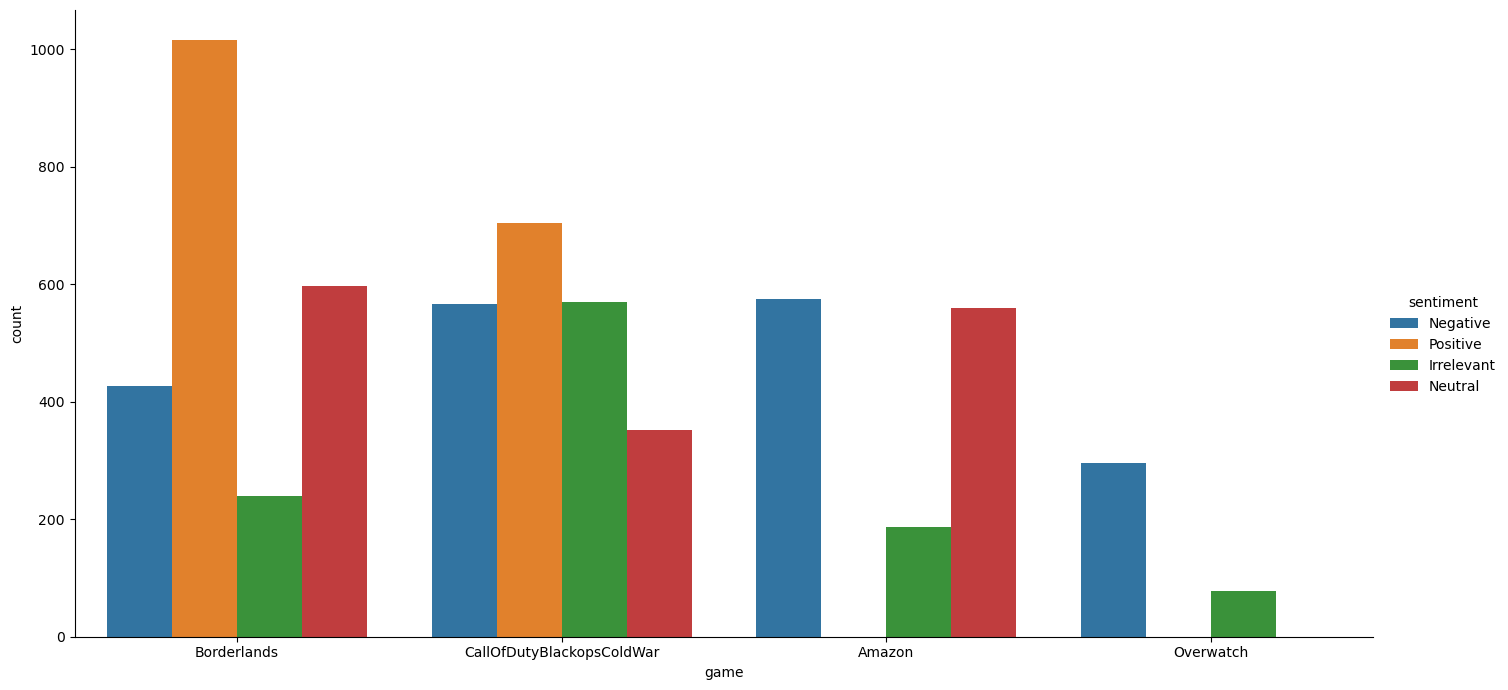

In [120]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [121]:
from sklearn import preprocessing 
label_encoder=preprocessing.LabelEncoder()

In [122]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [123]:
data=data.drop(['id'],axis=1)
data

,game,sentiment,text
23,1,1,the biggest dissappoinment in my life came out...
24,1,1,The biggest disappointment of my life came a y...
25,1,1,The biggest disappointment of my life came a y...
26,1,1,the biggest dissappoinment in my life coming o...
27,1,1,For the biggest male dissappoinment in my life...
...,...,...,...
5603,0,2,An amazing read aloud book for you and your ch...
5604,0,2,An amazing reading book for you and your child...
5605,0,2,An amazing book to read aloud for you and your...
5606,0,2,An amazing read aloud book for you and your ch...


In [124]:
data.nunique()

game            4
sentiment       4
text         5854
dtype: int64

In [125]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64